# U.S. Medical Insurance Costs

For this project, we will be investigating a medical insurance costs dataset in a .csv file using Python fundamentals. The goal of this project will be analyse the patient information in the dataset to predict insurance costs for potential patients

In [1]:
# import libraries
import csv
import pandas as pd
from matplotlib import pyplot as plt

Step 1 : We will create empty lists to save various attributes in the insurance.csv 

In [3]:
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

Step 2 : Function to load the column data from insurance.csv to the lists

In [5]:
# define function
def load_data (list_name, file_name, column_name):
    """
    Loads a specific column from the CSV and populates the list.
    Arguments:
        list_name(list)  : The name of the list that stores the column.
        file_name(str)   : The name of the CSV file to read from.
        column_name(str) : The name of the column to extract from the CSV file.
    Returns:
        list_name(list)  : The updated list with column data
    """
    # open csv file
    with open(file_name) as data:
        # read data from csv file
        csv_data = csv.DictReader(data)
        # iterate through rows in csv file
        for row in csv_data:
            # add data from the row to the list
            list_name.append(row[column_name])
        # return the updated list
        return list_name

Step 3 : Add data to the lists

In [7]:
ages = load_data (ages, 'insurance.csv', 'age')
sexes = load_data (sexes, 'insurance.csv', 'sex')
bmis = load_data (bmis, 'insurance.csv', 'bmi')
num_children = load_data (num_children, 'insurance.csv', 'children')
smoker_statuses = load_data (smoker_statuses, 'insurance.csv', 'smoker')
regions = load_data (regions, 'insurance.csv', 'region')
insurance_charges = load_data (insurance_charges, 'insurance.csv', 'charges')

Step 3 : Define class methods to analyse data loaded from the csv file

In [150]:
# define class 
class patient_info:
    # define instance of the class
    def __init__(self, ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.num_children = num_children
        self.smoker_statuses = smoker_statuses
        self.regions = regions
        self.insurance_charges = insurance_charges
        
    # method to compute average age of patients
    def age_analysis(self):
        # initialize variable to store total age
        total_age = 0
        count = 0
        # iterate through age list
        for age in self.ages:
            # add age to total age
            total_age += int(age)
            count += 1
        # compute average age = total age / length of age list, rounded to 2 decimal places
        average_age = round(total_age / count, 2)
        ax=plt.figure(figsize=(20,8))
        plt.hist(self.ages,bins=20,histtype='step')
        plt.xlabel('Age of Patients')
        plt.ylabel('Count of Patients')
        plt.title('Age Distribution')
        plt.show()
        plt.clf()
        return ("Average age of patients : " + str(average_age) + " years.")
        
    # method to compute the count and percentage of male and female patients
    def sex_analysis(self):
        # initialize variable to store count of male and female patients 
        males = 0
        females = 0
        # iterate through sex list
        for sex in self.sexes:
            # increment the count of corresponding sex
            if sex == "male":
                males += 1
            elif sex == "female":
                females += 1
        # compute percentage of male and female patients
        ax=plt.figure(figsize=(2,4))
        plt.bar(['Male'],[males,females],width=0.4)
        plt.bar(['Female'],[males,females],width=0.4)
        plt.ylabel('Count')
        plt.title('Sex Analysis')
        plt.show()
        plt.clf()

    # method to compute the count and percentage of smoking patients
    def smoker_analysis(self):
        # initialize variable to store count of smokers and non-smokers in patients 
        smokers = 0
        non_smokers = 0
        # iterate through smokers list
        for smoke in self.smoker_statuses:
            # increment the count of corresponding smoking status
            if smoke == "yes":
                smokers += 1
            elif smoke == "no":
                non_smokers += 1
        # compute percentage of male and female patients
        smoker_percent = round((smokers/len(self.sexes)*100),2)
        non_smoker_percent = round((non_smokers/len(self.sexes)*100),2)
        plt.pie([smoker_percent,non_smoker_percent],labels=['Smokers','Non-Smokers'],autopct='%0.2f%%')
        plt.title('Smokers Analysis')
        plt.show()
        plt.clf()
            
    #  method to find average insurance charges for unique region patients are from
    def regionwise_average_charges(self):
        unique_regions = []
        # iterate through regions list
        for region in self.regions:
            # add region to the list if not already present
            if region not in unique_regions: 
                unique_regions.append(region)
        # iterate through unique regions 
        average_charge_regionwise = []
        for region in unique_regions:
            # initialize variable to store total charge
            total_charge = 0
            count = 0
            # filter charges list by region
            charges = [charge for charge, region_filter in zip(self.insurance_charges, self.regions) if region_filter == region]
            for charge in charges:
                try:
                    # add charge to total_charge
                    total_charge += float(charge)
                    count += 1
                except ValueError:
                    # skip invalid charges
                    continue
            # compute average charges rounded to 2 decimal places
            if count > 0:
                average_charge = round(total_charge / count, 2)
                average_charge_regionwise.append(average_charge)
    
        # Visualize the results
        ax = plt.subplot(1,2,1)
        plt.pie(average_charge_regionwise, labels=unique_regions, autopct='%0.2f%%')
        plt.title('Average Insurance Charges for each Region')
        plt.show()
        plt.clf()
        ax = plt.subplot(1,2,2)
        bars = plt.bar(unique_regions,average_charge_regionwise)
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
        plt.xlabel('Region')
        plt.xticks(rotation=30)
        plt.ylabel('Average Insurance Charges')
        plt.show()
        plt.clf()
                
    # method to generate dictionary to store all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = self.ages
        self.patients_dictionary["sex"] = self.sexes
        self.patients_dictionary["bmi"] = self.bmis
        self.patients_dictionary["children"] = self.num_children
        self.patients_dictionary["smoker"] = self.smoker_statuses
        self.patients_dictionary["regions"] = self.regions
        self.patients_dictionary["charges"] = self.insurance_charges
        return self.patients_dictionary

Step 4 : Lets create an instance of the class to see the results of the analysis

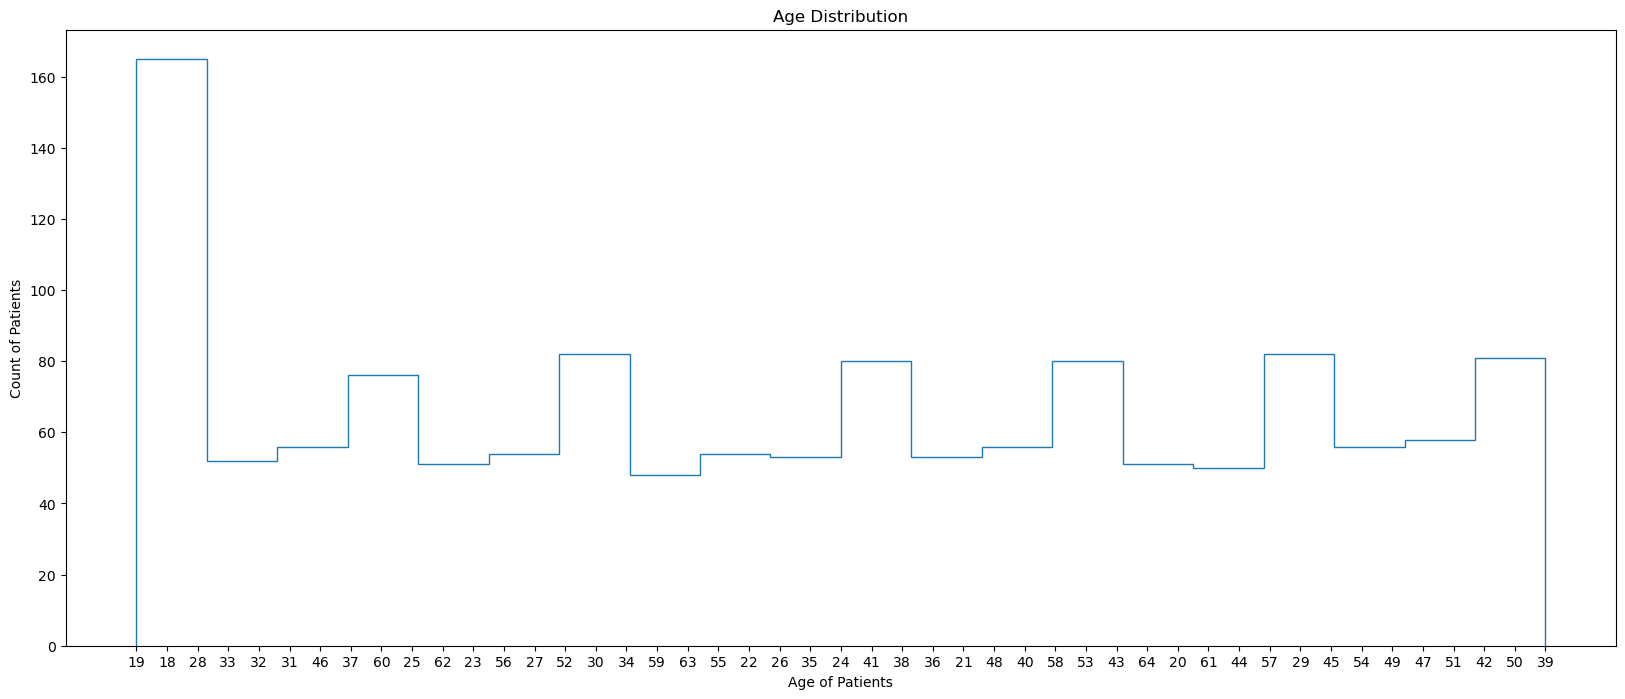

'Average age of patients : 39.21 years.'

<Figure size 640x480 with 0 Axes>

In [153]:
information = patient_info (ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)
information.age_analysis()

The average age of the patients in insurance.csv is around **39 years old**. This number is is representative for a broader population.
A further analysis on range and standard deviation of the patient age group will give us a random sampling of individuals.
Insurance companies could use this information to tailor their marketing efforts towards the age group that represents the majority of their customers. They can define policy adjustments and benefits offered accordingly.

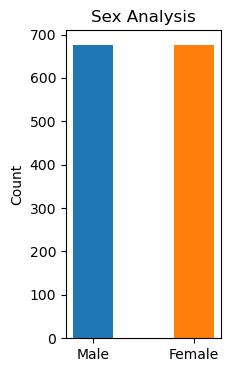

<Figure size 640x480 with 0 Axes>

In [155]:
information.sex_analysis()

The number of male and female are roughly same. The data understand the balance of male and female patients in the insured population, which can influence how resources and services are allocated.
By correlating gender with medical costs, you can identify specific health trends or conditions that are more prevalent in one gender.
The data also helps us to ensure that both genders are equally represented and that there is no unintentional bias in insurance offerings.

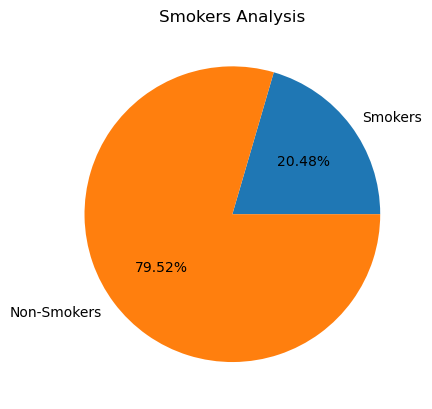

<Figure size 640x480 with 0 Axes>

In [157]:
information.smoker_analysis()

A higher percentage of non-smokers indicates a relatively healthier population, as smoking is a major risk factor for many serious health conditions.
While the overall population is healthier, it might still be worthwhile to target the smaller group of smokers with specific health interventions or support programs to further reduce smoking rates.
Insurance companies might adjust their marketing strategies to emphasize health benefits and preventive measures that align with the health-conscious majority.

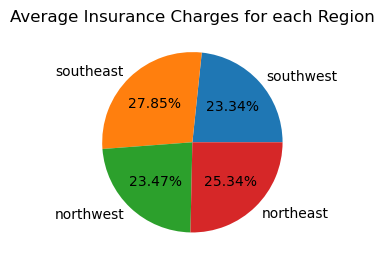

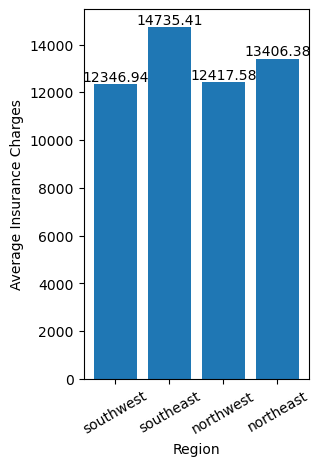

<Figure size 640x480 with 0 Axes>

In [162]:
information.regionwise_average_charges()

The average yearly medical insurance charge per individual is 13270 US dollars.
The above data shows average charges for each region.
This acts as a benchmark to compare individual cases against. This helps identify outliers or abnormal charges that may need further investigation.
By analyzing the average insurance charges, companies can adjust their pricing strategies to ensure they cover the expected costs while remaining competitive.
Correlating average insurance charges with other factors (like age, smoking status, or gender) can help in assessing the risk profiles of different groups and adjusting policies accordingly.

In [165]:
patient_data = information.create_dictionary()
df = pd.DataFrame(patient_data)
print(df.head())

  age     sex     bmi children smoker    regions      charges
0  19  female    27.9        0    yes  southwest    16884.924
1  18    male   33.77        1     no  southeast    1725.5523
2  28    male      33        3     no  southeast     4449.462
3  33    male  22.705        0     no  northwest  21984.47061
4  32    male   28.88        0     no  northwest    3866.8552
